In [25]:
import pandas
import matplotlib.pyplot as plt
titanic = pandas.read_csv('train.csv')
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
women = titanic.loc[titanic.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = titanic.loc[titanic.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


女性存活率74.20%,男性存活率18.89%


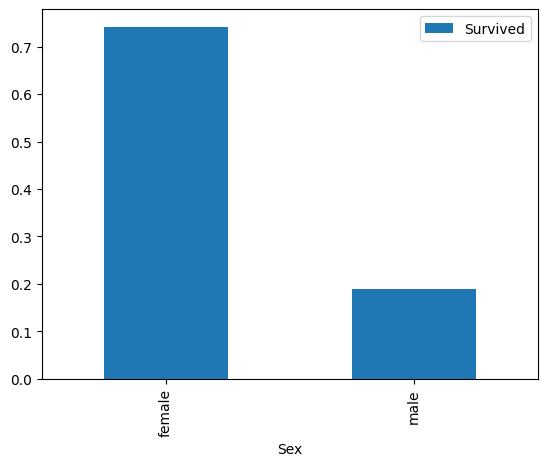

In [21]:
# 男性和女性存活情况
titanic[['Sex','Survived']].groupby('Sex').mean().plot.bar()

survive_sex=titanic.groupby(['Sex','Survived'])['Survived'].count()

print('女性存活率%.2f%%,男性存活率%.2f%%' %
     (survive_sex.loc['female',1]/survive_sex.loc['female'].sum()*100,
      survive_sex.loc['male',1]/survive_sex.loc['male'].sum()*100)
     )

Sex       female  male
Survived              
0             81   468
1            233   109


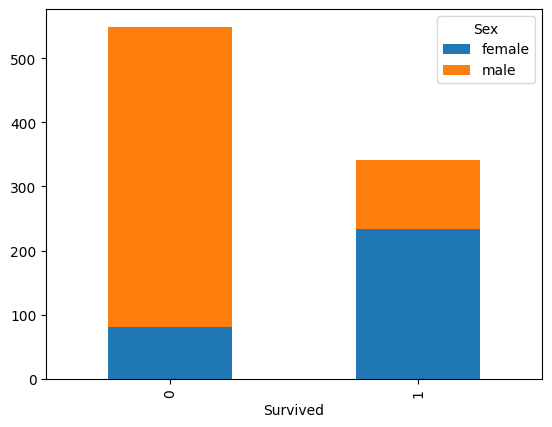

In [26]:
# 查看survived 与 Sex的关系
Survived_Sex = titanic['Sex'].groupby(titanic['Survived'])
print(Survived_Sex.value_counts().unstack())

Survived_Sex.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


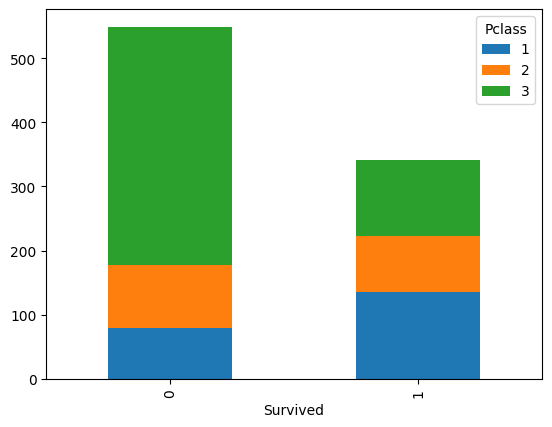

In [27]:
# 查看Survived 与 Pclass的关系
Survived_Pclass = titanic['Pclass'].groupby(titanic['Survived'])
print(Survived_Pclass.value_counts().unstack())

Survived_Pclass.value_counts().unstack().plot(kind = 'bar', stacked = True)
plt.show()

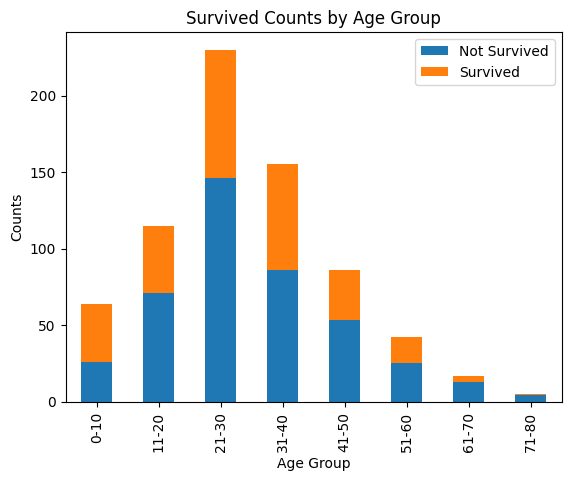

Age Group: 0-10, Survival Rate: 59.38%
Age Group: 11-20, Survival Rate: 38.26%
Age Group: 21-30, Survival Rate: 36.52%
Age Group: 31-40, Survival Rate: 44.52%
Age Group: 41-50, Survival Rate: 38.37%
Age Group: 51-60, Survival Rate: 40.48%
Age Group: 61-70, Survival Rate: 23.53%
Age Group: 71-80, Survival Rate: 20.00%


In [32]:
import matplotlib.pyplot as plt

# 将年龄分为若干个区间
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic['AgeGroup'] = pandas.cut(titanic['Age'], bins=age_bins, labels=labels)

# 计算每个年龄区间内的幸存者和遇难者数量
age_survived = titanic.groupby(['AgeGroup', 'Survived']).size().unstack()

# 绘制年龄区间图
age_survived.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Counts')
plt.title('Survived Counts by Age Group')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# 计算每个年龄区间内的幸存者和遇难者数量
age_survived = titanic.groupby(['AgeGroup', 'Survived']).size().unstack()

# 计算每个年龄段的总人数
age_total = age_survived.sum(axis=1)

# 计算每个年龄段的幸存比例
age_survival_rate = age_survived[1] / age_total

# 打印每个年龄段的幸存与非幸存的比例
for age_group, survival_rate in age_survival_rate.items():
    print(f"Age Group: {age_group}, Survival Rate: {survival_rate:.2%}")




In [2]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [19]:
print(titanic['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [4]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [5]:
print(titanic['Embarked'].unique())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
print(titanic['Embarked'].unique())

['S' 'C' 'Q']
['S' 'C' 'Q']


In [6]:
titanic['Cabin'] = titanic['Cabin'].fillna( 'U' )

In [7]:
titanic.loc[titanic['Sex'] == 'male','Sex' ] = 0
titanic.loc[titanic['Sex'] == 'female','Sex' ] = 1
print(titanic['Embarked'].unique())   # ['S' 'C' 'Q' nan]
titanic.loc[titanic['Embarked'] == 'S','Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C','Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q','Embarked'] = 2
titanic

['S' 'C' 'Q']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,U,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1


In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score
# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

alg = SVC(C=2,kernel='rbf',gamma=10,decision_function_shape='ovr')
predictors = ['Pclass','Sex' ,'Age','SibSp', 'Parch' , 'Fare' ,'Embarked']

kf = KFold(n_splits=3, shuffle=True, random_state=1)
# kf  K折交叉验证  这里是3折交叉验证

test_accurate = []
for train, test in kf.split(titanic[predictors]):  # 表示 划分这些个特征做交叉验证

    train_predictors = (titanic[predictors].iloc[train,:]) # 拿出来训练的数据 pandas.iloc方法提供了基于整数的索引方式
    train_target = titanic["Survived"].iloc[train] # 拿出来lable值
    # 模型计算
    alg.fit(train_predictors, train_target)

    test_predictions = (titanic[predictors].iloc[test,:]) # 拿出来测试的数据集
  
    test_target = titanic["Survived"].iloc[test] # 拿出来测试的lable值
    # 这里有个东西需要注意，训练集  测试集 验证集


    pre_train = alg.predict(train_predictors)
    pre_test = alg.predict(test_predictions)

    test_accurate.append(accuracy_score(test_target,pre_test))
test_accurate = sum(test_accurate)/3 # 取平均值
print(test_accurate)



0.6397306397306397


In [9]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,accuracy_score
# SVM
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier

alg = KNeighborsClassifier(n_neighbors=10)
predictors = ['Pclass','Sex' ,'Age','SibSp', 'Parch' , 'Fare' ,'Embarked']

kf = KFold(n_splits=3, shuffle=True, random_state=1)
# kf  K折交叉验证  这里是3折交叉验证

test_accurate = []
for train, test in kf.split(titanic[predictors]):  # 表示 划分这些个特征做交叉验证

    train_predictors = (titanic[predictors].iloc[train,:]) # 拿出来训练的数据 pandas.iloc方法提供了基于整数的索引方式
    train_target = titanic["Survived"].iloc[train] # 拿出来lable值
    # 模型计算
    alg.fit(train_predictors, train_target)

    test_predictions = (titanic[predictors].iloc[test,:]) # 拿出来测试的数据集
  
    test_target = titanic["Survived"].iloc[test] # 拿出来测试的lable值
    # 这里有个东西需要注意，训练集  测试集 验证集


    pre_train = alg.predict(train_predictors)
    pre_test = alg.predict(test_predictions)

    test_accurate.append(accuracy_score(test_target,pre_test))
test_accurate = sum(test_accurate)/3 # 取平均值
print(test_accurate)

0.7037037037037037
